In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn==0.22
!pip install umap-learn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-1.0.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 3.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-dimension
# !pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('./drive')

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from tqdm.notebook import tqdm

In [ ]:
!cp 'drive/MyDrive/optimizer/data/R22.zip' R22.zip

In [ ]:
!unzip R22.zip

Archive:  R22.zip
replace R22.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!head R22.txt

10 770 3 13 0
5 5 3
17.853953266103332 4.878442679441172 0.765417512608847 5.366602012813171 14.389115841783337 12.398200667087197 -3.809431996289585 4.796422781510271 8.330201740008047 1.348901425248499
14.390687909432270 12.391814672777397 4.118221793743355 5.259551808438495 11.808573569819224 8.880229053167923 -2.728889146145640 3.774131975618386 12.658570049148661 -0.485166046455832
18.455352684214994 6.650495022055278 -1.506966405942717 5.418618300665968 8.950828190724621 15.823562107828083 1.463791124657301 3.616298000512074 4.414894012524577 -1.100224329298179
18.556968181693556 5.392582019276432 10.700456543681071 7.420157611624227 13.932120637075240 12.030954950518570 1.739842991680633 3.667505940242886 7.154482165040507 -1.790415666181383
0.550857233429239 5.036454495748143 2.160215305542646 2.882952369740103 13.452165342909542 15.466542226624803 5.711586539231865 -3.568343666469939 5.031173043035117 1.051342292043646
3.246543145804532 4.040300086998270 5.148325182167776 3.99

In [ ]:
with open('R22.txt') as fp:
  line = fp.readline()
  line = line.split(' ')
  d, n, m, k, p = [int(item) for item in line]
  line = fp.readline()
  line = line.split(' ')
  K = [int(item) for item in line]


In [ ]:
!tail -n +3 R22.txt > R22_clean.txt

In [ ]:
vectors = np.fromfile('R22_clean.txt', sep=' ').reshape(n, -1)

In [ ]:
vectors

array([[ 17.85395327,   4.87844268,   0.76541751, ...,   4.79642278,
          8.33020174,   1.34890143],
       [ 14.39068791,  12.39181467,   4.11822179, ...,   3.77413198,
         12.65857005,  -0.48516605],
       [ 18.45535268,   6.65049502,  -1.50696641, ...,   3.616298  ,
          4.41489401,  -1.10022433],
       ...,
       [ 60.16369644,  23.16999148,  16.10293174, ...,  36.3665959 ,
         37.1260535 , -23.35243457],
       [ 63.17732844,  14.9427233 ,  16.16885015, ...,  36.98232214,
         31.45907932, -20.81153828],
       [114.53779026,  16.11820889,  19.20849108, ...,  -0.56258896,
         57.56839856, -35.24485832]])

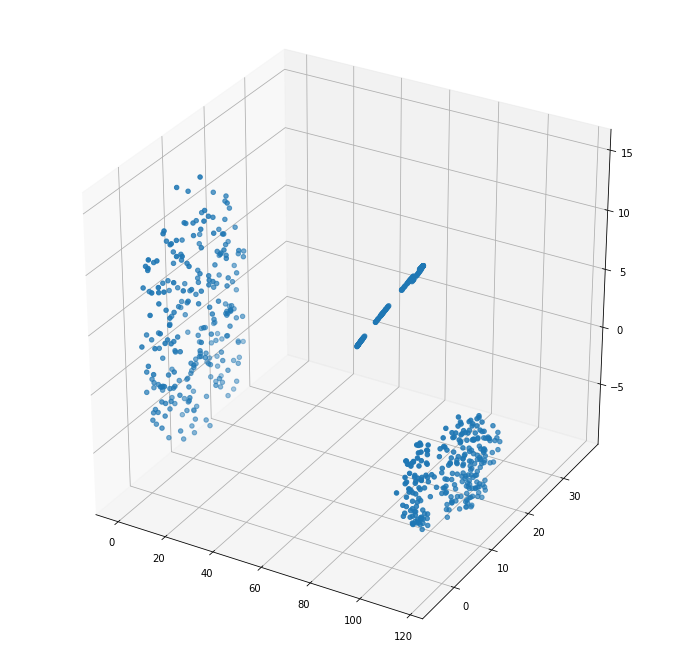

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 3])
_ = plt.show()

In [ ]:
m

3

In [ ]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

gmm = GaussianMixture(n_components=m, covariance_type='diag', 
                      random_state=0, n_init=32, max_iter=10000, tol=1e-6)
gmm.fit(vectors)



GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=10000,
                means_init=None, n_components=3, n_init=32,
                precisions_init=None, random_state=0, reg_covar=1e-06,
                tol=1e-06, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [ ]:
gmm.means_

array([[ 10.3856946 ,   5.39205652,   3.5244407 ,   3.64857213,
         11.83391273,   9.91135712,   2.23110546,   3.23965366,
          5.05491857,   0.78414582],
       [ 58.14124945,  28.10910296,  16.15864536,   2.27512804,
         27.40606688,  38.24318862,  -4.66755709,  36.88700193,
         32.33638018, -17.55637196],
       [109.35271744,   9.08923415,  20.60009273,  -4.33672537,
         54.80579162,  39.7170116 ,   8.5418399 ,   5.0022898 ,
         57.11447836, -32.7221164 ]])

In [ ]:
def top_k_outliers(vectors, k):
  scores = gmm.score_samples(vectors)
  top_k = np.argpartition(-scores, -k)[-k:]
  return top_k, scores[top_k]

In [ ]:
outlier_ind, _ = top_k_outliers(vectors, p)

In [ ]:
labels = gmm.predict(vectors)
if p > 0:
  labels[outlier_ind] = -1

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2,
       2, 1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 2, 1,
       2, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2,
       1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2,
       2, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 1, 1,

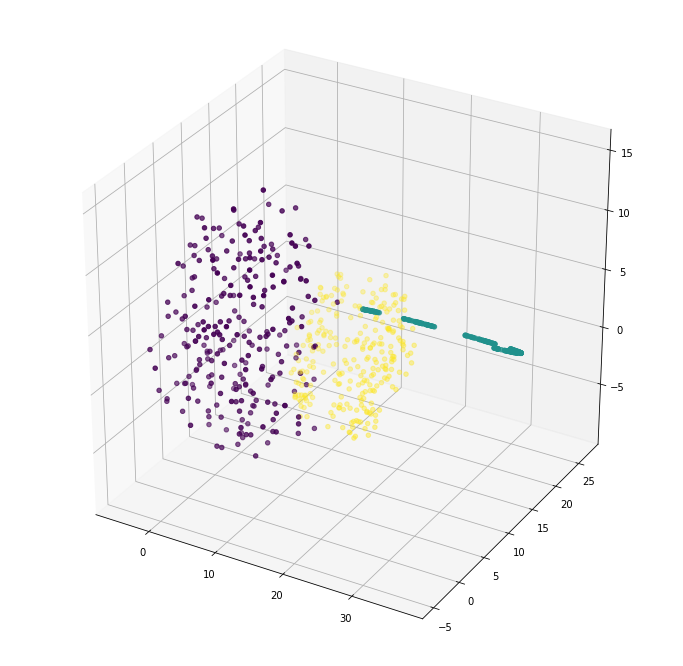

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(vectors[:, 1], vectors[:, 2], vectors[:, 3], c=labels)
_ = plt.show()

In [ ]:
from numba import njit, jit

@jit
def noisy_center_radius(points, k):
  dist_matrix = np.zeros((points.shape[0], points.shape[0]))
  for i in range(points.shape[0]):
    for j in range(i):
      dist = np.linalg.norm(points[i] - points[j])
      dist_matrix[i, j] = dist
  dist_matrix = dist_matrix.reshape(-1)
  top_k_dist = np.argsort(dist_matrix)[-k:]
  rows = top_k_dist // points.shape[0]
  cols = top_k_dist % points.shape[0]
  center = 0.5*(points[cols] + points[rows]).mean(axis=0)
  radius = dist_matrix[top_k_dist].mean()/2
  return center, radius

def center_radius(points):
  dist = torch.cdist(points, points)
  ind = dist.argmax()
  row = (torch.div(ind, points.size(0), rounding_mode='floor')).item()
  col = (ind % points.size(0)).item()
  radius = (dist[row, col]/2).item()
  center = 0.5 * (points[row] + points[col])
  return center, radius


manifold_center = []
manifold_radius = []

for sphere in tqdm(range(m)):
  points = torch.from_numpy(vectors[labels==sphere])
  # points = vectors[labels==sphere]
  center, radius = center_radius(points)
  manifold_center.append(center)
  manifold_radius.append(radius)

manifold_center = np.vstack(manifold_center)

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
gmm.means_

array([[ 10.3856946 ,   5.39205652,   3.5244407 ,   3.64857213,
         11.83391273,   9.91135712,   2.23110546,   3.23965366,
          5.05491857,   0.78414582],
       [ 58.14124945,  28.10910296,  16.15864536,   2.27512804,
         27.40606688,  38.24318862,  -4.66755709,  36.88700193,
         32.33638018, -17.55637196],
       [109.35271744,   9.08923415,  20.60009273,  -4.33672537,
         54.80579162,  39.7170116 ,   8.5418399 ,   5.0022898 ,
         57.11447836, -32.7221164 ]])

In [ ]:
manifold_radius

[12.918550621145004, 12.977899999631482, 12.970300411986582]

In [ ]:
manifold_center

array([[  8.78209503,   6.40432141,   3.85121972,   4.90389142,
         12.16550374,   9.44127231,   2.55640942,   2.21027591,
          3.88169953,   0.35280621],
       [ 59.16952845,  25.15486741,  16.20637667,   2.1446089 ,
         27.76852469,  37.2240926 ,  -5.66394823,  37.33284726,
         28.23294297, -14.79520756],
       [109.10281872,   8.6036155 ,  21.01029047,  -4.03012278,
         54.59593544,  39.20633993,   7.53490759,   4.13025428,
         57.47415979, -34.27897792]])

In [ ]:
from scipy.optimize import minimize, differential_evolution, dual_annealing

@njit
def loss_center_given_radius(center, points, radius):
  # return (((points - center)**2).sum(axis=1) > radius**2).sum()
  return np.linalg.norm(((points - center)**2).sum(axis=1) - radius**2)

@njit
def loss_center_radius(x, points):
  center = x[:-1]
  radius = x[-1]
  return np.linalg.norm(((points - center)**2).sum(axis=1) - radius**2)

def print_steps(x, f, context):
  print(f)

@jit
def estimate_corrected_radius(sphere):
  center_b1 = manifold_center[sphere, :] - 2.0
  center_b2 = manifold_center[sphere, :] + 2.0
  # radius_b1 = manifold_radius[sphere] - 0.1
  # radius_b2 = manifold_radius[sphere] + 0.1
  
  bounds = [(center_b1[i], center_b2[i]) for i in range(d)]
  # bounds.append([radius_b1, radius_b2])
  result = dual_annealing(func=loss_center_given_radius,
                        bounds=bounds, maxiter=1000,
                        args=(vectors[labels==sphere], manifold_radius[sphere]))
  print(result)
  center = result.x
                        
  return center

In [ ]:
manifold_corrected_desc = np.vstack([estimate_corrected_radius(sphere) for sphere in tqdm(range(m))])

  0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-29-495715e5b708>:17: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "estimate_corrected_radius" failed type inference due to: Untyped global name 'dual_annealing': cannot determine Numba type of <class 'function'>

File "<ipython-input-29-495715e5b708>", line 26:
def estimate_corrected_radius(sphere):
    <source elided>
  # bounds.append([radius_b1, radius_b2])
  result = dual_annealing(func=loss_center_given_radius,
  ^

  @jit
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "estimate_corrected_radius" was compiled in object mode without forceobj=True.

File "<ipython-input-29-495715e5b708>", line 18:
@jit
def estimate_corrected_radius(sphere):
^

  state.func_ir.loc))
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:188: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detecte

     fun: 20.223408249821272
 message: ['Maximum number of iteration reached']
    nfev: 20254
    nhev: 0
     nit: 1000
    njev: 23
  status: 0
 success: True
       x: array([ 9.17748392,  6.36948975,  3.92132181,  4.24238431, 12.03513903,
        9.72695699,  2.77534288,  3.01090066,  4.24017677,  0.14571235])
     fun: 0.0006506426658419456
 message: ['Maximum number of iteration reached']
    nfev: 20892
    nhev: 0
     nit: 1000
    njev: 81
  status: 0
 success: True
       x: array([ 59.16504756,  25.153073  ,  16.20836696,   2.14120494,
        27.7701957 ,  37.22827738,  -5.66359882,  37.33256148,
        28.23215267, -14.79512319])
     fun: 2.951611341541729
 message: ['Maximum number of iteration reached']
    nfev: 20353
    nhev: 0
     nit: 1000
    njev: 32
  status: 0
 success: True
       x: array([109.22234994,   8.8158836 ,  20.8608405 ,  -4.14183027,
        54.67239384,  39.39239517,   7.71953252,   4.17467013,
        57.32666698, -34.18559881])


In [ ]:
manifold_corrected_center = manifold_corrected_desc[:, :]

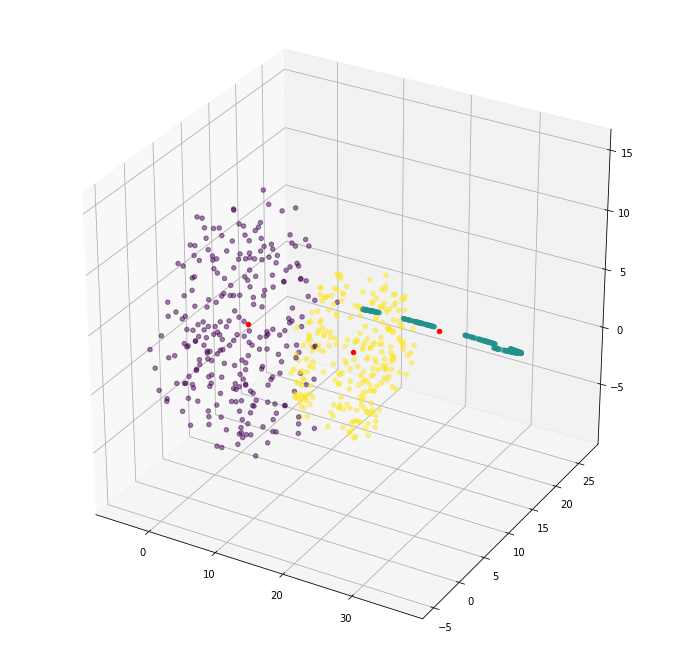

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(vectors[:, 1], vectors[:, 2], vectors[:, 3], c=labels, alpha=0.5)
for sphere in range(m):
  ax.scatter(manifold_corrected_center[sphere, 1], manifold_corrected_center[sphere, 2], manifold_corrected_center[sphere, 3], c='red')

_ = plt.show()

In [ ]:
import skdim.id as intd

manifold_dims = []

for sphere in tqdm(range(m)):
  lpca = intd.lPCA().fit_pw(vectors[labels==sphere], n_neighbors = 64, n_jobs = 1)
  # pca = intd.DANCo().fit(vectors[labels==sphere])
  # manifold_dims.append(pca.dimension_)
  manifold_dims.append(int(np.round(lpca.dimension_pw_.mean())))
  

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
for sphere in range(m):
  if manifold_dims[sphere] == 1:
    manifold_dims[sphere] = 2

In [ ]:
manifold_dims

[10, 2, 5]

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine


sub_clusters = []
for sphere in tqdm(range(m)):
  points = vectors[labels==sphere]
  original_index = np.where(labels==sphere)[0]
  cluster = BayesianGaussianMixture(n_components=K[sphere], covariance_type='full', n_init=32)
  if sphere == 1:
    cluster = SpectralClustering(n_clusters=K[sphere], random_state=0, affinity='nearest_neighbors')
  cluster.fit(points)
  submanifold_clusters = []
  if sphere != 1:
    sub_labels = cluster.predict(points)
  else:
    sub_labels = cluster.labels_

  for subc in range(K[sphere]):
    submanifold_clusters.append(original_index[np.where(sub_labels == subc)])
  sub_clusters.append(submanifold_clusters)

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
sub_clusters

[[array([147, 150, 203, 204, 208, 226, 239, 245, 286, 293, 301, 303, 305,
         311, 327, 336, 340, 359, 367, 369, 371, 374, 389, 393, 403, 406,
         408, 410, 421, 429, 448, 449, 454, 459, 517, 525, 527, 530, 535,
         557, 564, 569, 572, 576, 579, 609, 649, 680, 681, 702, 710, 717]),
  array([141, 145, 149, 153, 156, 157, 180, 186, 193, 195, 207, 218, 244,
         276, 297, 300, 304, 317, 321, 331, 334, 349, 385, 398, 400, 407,
         418, 438, 468, 473, 477, 503, 508, 532, 541, 548, 574, 606, 614,
         618, 620, 621, 625, 631, 647, 665, 679, 685, 688, 698, 711, 741]),
  array([160, 161, 172, 173, 185, 192, 194, 197, 221, 230, 258, 260, 275,
         279, 313, 326, 351, 355, 368, 377, 378, 401, 409, 450, 467, 482,
         486, 537, 550, 591, 601, 607, 613, 636, 639, 640, 643, 656, 659,
         662, 682, 684, 687, 693, 700, 719, 727, 739, 763, 768]),
  array([129, 134, 166, 176, 191, 196, 223, 252, 257, 259, 273, 278, 283,
         307, 316, 348, 383, 384, 397, 416

In [ ]:
from numba import njit
from sklearn.decomposition import PCA

@njit
def get_best_fitting_plane_vector(centered, dim):

    # Calculate the covariance matrix of the coordinates
    covariance_matrix = np.cov(centered, rowvar=False) # Variables = columns

    # Calculate the eigenvalues & eigenvectors of the covariance matrix
    e_val, e_vect = np.linalg.eig(covariance_matrix)

    # The normal vector to the plane is the eigenvector associated to the minimum eigenvalue
    min_eval = np.argsort(e_val)[:dim]
    normal_vector = e_vect[:, min_eval]

    return normal_vector

def get_best_fitting_plane_vector_pca(centered, dim):

    pca = PCA(n_components=d)

    pca.fit(centered)

    normal_vector = pca.components_[-dim:]

    return normal_vector.T

In [ ]:
affine_a = []
affine_b = []

for sphere in tqdm(range(m)):
  points = vectors[labels==sphere]
  shift = points.mean(axis=0)
  centered = points - shift
  a = get_best_fitting_plane_vector_pca(centered, d-manifold_dims[sphere])
  b = a.T @ shift
  affine_a.append(a)
  affine_b.append(b)


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
affine_a

[array([[ 0.89040776,  0.25921081, -0.12906297, -0.03799671, -0.01937398,
          0.02270088, -0.00100511, -0.00757608],
        [ 0.31487767,  0.09777136, -0.00924399, -0.23074307, -0.02681946,
          0.02955399, -0.05543148, -0.00782165],
        [-0.02313056, -0.00481629, -0.01937204,  0.11233613, -0.97465764,
          0.17936173, -0.05868061, -0.02834448],
        [-0.00619226, -0.00356726, -0.00302582,  0.00719825,  0.02540078,
          0.02227436,  0.13829085, -0.98948619],
        [-0.0371864 ,  0.03844851, -0.01896126,  0.01789572,  0.1817425 ,
          0.97879225,  0.02074712,  0.0283673 ],
        [ 0.09110668, -0.64468239, -0.73519047,  0.02050254,  0.02255486,
          0.0225424 , -0.0352192 ,  0.00457147],
        [ 0.01377738, -0.02094908,  0.01367295, -0.09009315, -0.07386275,
          0.00418854,  0.96718221,  0.13682498],
        [ 0.29366641, -0.70529484,  0.63792243,  0.02798986, -0.00293357,
          0.04636618, -0.01125753, -0.00350903],
        [ 0.0587

In [ ]:
with open('output.txt', 'w+') as fp:
  fp.write(f'{n} {m}\n')
  for sphere in range(m):
    fp.write(f'{manifold_dims[sphere]} {K[sphere]} Sphere\n')
    if manifold_dims[sphere] == d:
      fp.write('\n')
    else:
      for i in range(affine_a[sphere].shape[1]):
        fp.write(' '.join(affine_a[sphere][:, i].astype(str).tolist()) + '\n')
      fp.write(' '.join(affine_b[sphere].astype(str).tolist()) + '\n')
    fp.write(' '.join(manifold_corrected_center[sphere, :].astype(str).tolist()) + f' {manifold_corrected_radius[sphere]} \n')
    for subc in range(K[sphere]):
      subc_points = sub_clusters[sphere][subc]
      fp.write(f'{len(subc_points)} ')
      fp.write(' '.join((subc_points+1).astype(str).tolist()))
      fp.write('\n')
  fp.write(f'{p}')
  if p > 0:
    fp.write(' ' + ' '.join((outlier_ind+1).astype(str).tolist()))